## Pricing asian and lookback options via Monte carlo.


# Euler-Maruyma Method
Firstly we shall go over the basics and what the Eurler-Maryuma method is.
The 'Euler-Maryuma Method' is a method for the approximating numerical solution of a stochastic differential equation (SDE).
Consider the following SDE: $$dX_t=a(X_t,t)dt+b(X_t,t)dW_t$$
where; $$\Delta t=\frac{T}{t}$$

The $dW_t$ in the equation represents the change in  Wiener Process, where;
$$\Delta W_t=W_tn+1-W_n$$
Then the Euler–Maruyama approximation to the true solution X is the Markov chain Y defined as follows:

partition the interval $[0, T]$ into N equal subintervals of width $${\displaystyle \Delta t>0}\Delta t>0:
{\displaystyle 0=\tau _{0}<\tau _{1}<\cdots <\tau _{N}=T{\text{ and }}\Delta t=T/N;}0=\tau _{{0}}<\tau _{{1}}<\cdots <\tau _{{N}}=T;$$ <br>
Hence the Euler-Maruyma equaiton is, 
$${\displaystyle \,Y_{n+1}=Y_{n}+a(Y_{n},\tau _{n})\,\Delta t+b(Y_{n},\tau _{n})\,\Delta W_{n},}$$


**Euler-Maruyma Method using SDE**
<br>
Firstly we have constant drift which is given by, $$a(S_t,t)\Delta t$$
and some diffusion term, given by, $$b(S_t,t)\Delta t$$
<br>
Recall that $R_i$ is defined as the following: $$R_i=\frac{S_i+1-S_i}{S_i+1}=Mean+Standard Deviation\times\phi$$
<br>
$$R_i=\frac{S_i+1-S_i}{S_i+1}= \mu dt+\sigma\sqrt dt\phi$$
rearranging we get, $$S_(i+1)-S_i=\mu Sdt+\sigma S\sqrt dt\phi$$
since $dS=S_(i+1)-S_i$, i.e just the change in stock price
<br> hence our asset price model in the continous-time limit, using the Wiener process notation, can be written as;, <br>$$dS(t)=\mu S(t)dt +\sigma S(t)dW(t)$$
where $$r:risk-free rate=mean (\mu)$$
      $$\sigma=volatlity$$
      $$\phi=standard normal random variable$$
      
<br> Therefore we can rewrite the equation as;
$$dS=rSdt+ \sigma SdW_t$$
$$\frac{dS}{S}=rSdt+ \sigma SdW_t$$
<br>
$$d(log S)=(r-\frac{1}{2}\sigma^2)dt+\sigma\sqrt dt\phi$$
and finally we get;
$$S(t)=S(0)exp^{(r-\frac{1}{2}\sigma^2)dt+\sigma\sqrt dt\phi}$$ (Resulted via intergration)

In [1]:
'''
Today's stock price S0  = 100
             Strike, E  = 100
Time to expiry (T - t)  = 1-year
            volatility  = 20%
constant risk-free rate = 5%

'''

import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
from numpy import *
from scipy.stats import norm
from tabulate import tabulate

import cufflinks as cf
cf.set_config_file(offline=True)

In [49]:
def euler_path(s0, mu, sigma, horizon, timesteps, n_sims):
    S0 = s0         
    r = mu          
    T = horizon     
    t = timesteps   
    n = n_sims      
    
    dt = T/t         
    
   
    S = zeros((t+1, n))
    S[0] = S0

    for i in range(1, t+1):
        z = random.standard_normal(n)     
        S[i] = S[i-1] * exp((r - 0.5 * sigma ** 2) * dt + sigma * sqrt(dt) * z) 
        
    return S
    

In [50]:
euler_price=pd.DataFrame(euler_path(100, 0.05, 0.2, 1, 252, 10000))
euler_price

0           1           2           3           4           5     \
0    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
1     98.505690   99.729842   99.769519   99.653485   99.284100   99.956356   
2     97.321474   99.100293   97.907448   98.712923   98.413388   97.429732   
3     96.831218   98.943898   99.526929   99.948032   99.082365   98.260149   
4     97.133978   99.036241   98.753024  100.291547   98.269270   98.242076   
..          ...         ...         ...         ...         ...         ...   
248  110.837674   94.352547  108.768098  116.599531  112.537410  125.717576   
249  112.993589   91.832738  107.271095  115.392183  113.057752  126.663077   
250  112.762796   91.313371  106.207118  112.977668  114.871834  130.321607   
251  114.935155   92.695856  105.994500  112.562330  117.184839  131.743106   
252  115.158244   92.430226  108.212787  112.030337  117.158787  130.600119   

           6           7           8           9     ...        9990  \
0    100.000000  100.000000  100.000000  100.000000  ...  100.000000   
1     99.862062  101.599486   98.419533  100.651778  ...   99.887855   
2     97.735699  101.167505   98.540950  102.091791  ...   98.818573   
3     99.552591   98.113471   97.496483  100.980428  ...   99.429800   
4    100.377333   99.573250   99.436498   99.507808  ...   99.644470   
..          ...         ...         ...         ...  ...         ...   
248  121.470988  112.587750   86.396053   98.543803  ...  115.217286   
249  118.470873  113.189913   86.654547   96.953070  ...  115.908500   
250  117.971275  113.572413   85.643000   97.036457  ...  116.030321   
251  118.109834  112.436553   85.909634   96.114014  ...  116.368834   
252  120.815971  111.617035   85.101804   94.813963  ...  115.985159   

           9991        9992        9993        9994        9995        9996  \
0    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
1     98.990211  100.612141   98.724158   99.488513  100.505895  101.550811   
2    100.465218   99.331795   96.438665   99.926678  100.769026  100.776448   
3    103.277041  100.668004   96.144089  100.139950  101.225278   99.951225   
4    101.616877  102.952335   95.348520   99.731169  102.558181  100.772559   
..          ...         ...         ...         ...         ...         ...   
248  115.826874   92.705968  120.898330  129.517599  110.311609   65.624084   
249  117.809719   93.171598  119.660534  129.811321  110.871544   64.626998   
250  118.375283   94.675454  121.578293  132.725488  109.596110   65.303427   
251  119.106219   95.945831  121.120584  134.561769  108.908374   64.049701   
252  119.527123   96.994056  119.947552  132.476989  106.930424   64.763951   

           9997        9998        9999  
0    100.000000  100.000000  100.000000  
1    100.802810  101.364542  100.821136  
2    100.113640  101.129014  100.879754  
3    100.690197  101.800078   99.501600  
4    100.714762  100.426881  100.348296  
..          ...         ...         ...  
248  169.130160   84.001820   86.819733  
249  168.003960   83.197503   84.123714  
250  166.706402   84.328505   84.922072  
251  168.683212   83.391207   82.972277  
252  169.889054   81.036784   83.225029  

[253 rows x 10000 columns]

In [4]:
euler_price.iloc[-1].iplot(kind='histogram', title='Discrete Euler Maruyama Simulation',
                          bins=200, color='blue')

In [5]:
euler_price.iloc[:, :400].iplot(title='Discrete Euler Maruyama Simulation', xTitle='Time Steps', yTitle='Price Levels')

Finding The Black-Scholes Call Option Value:


In [6]:
class BS:
    """"
    Attrubitues....:
    spot: int or float
    strike: int or float
    rate: float
    dte: float in years
    vol: float 
    
    """
 
 
    def __init__(self,spot,strike,rate,vol,dte):
        self.spot=spot #underlying assest price
        self.strike=strike #Price of the option
        self.rate=rate #intrest rate
        self.dte=dte #Maturity date
        self.vol=vol #Volatilty 
        
        self._a=self.vol*self.dte**0.5 #(sigma*root(t))
        
        if self.strike==0:
            raise ZerodevisionError("Strike price cannot be zero")
        else:
            self._d1=(log(self.spot/self.strike)+
                      (self.rate+(self.vol**2)/2)*self.dte)/self._a
        self._d2=self._d1-self._a #d2=d1-sigma*root(t)
        self._b=e**-(self.rate*self.dte) #e^-rt
        
    def price(self):
        if (self.vol==0 or self.dte==0):
            call=max(0,self.spot-self.strike)
            put=max(0,self.strike-self.spot)
        else:
            call=self.spot * norm.cdf(self._d1)-self.strike*self._b*norm.cdf(self._d2)
            put=self.strike * norm.cdf(-self._d2)-self.strike*norm.cdf(-self._d1)
            
        return (f'call price:{call} , put price:{put}')
                

In [7]:
option=BS(100,100,0.05,0.2,1)
option.price()

'call price:10.450583572185565 , put price:7.72129588053766'

# ASIAN OPTIONS:
Asian options have a payoff that depends on the average value of the underlying asset over some period before expiry. They are strongly path-dependant. They are strongly path dependent because their value prior to expiry depends on the average to date of the asset. The average used in the calculation of the options payoff can be defined in many different ways. In our case we are going to take a look at Arithmetic and Geometric averages. The data could be continously sampled, however more commonly for practial and legal reasons the data is usaully sampled discretely. The calculated average may only use every Friday's closing price.

Case 1: Fixed Strike Price and Arithemetic Average (Call option):
The payoff would be:$$V(t,s)=e^{-r(T-t)}E^Q[(A_t-E)^+|S_t=s]$$
Payoff of call: $$C_T=max(0,\frac{1}{n}\sum_{i=1}^{n}S_i -E)$$
Therefore; 
$$(CALL)C_t=max(A-E,0)$$
$$(PUT)P_t=max(E-A,0)$$
where $$A_t=\frac{1}{n}\sum_{i=1}^{n} S_t$$ and E=strike price

In [8]:
S = euler_path(100, 0.05, 0.2, 1, 252, 10000)
A = np.mean(S[-1], axis=0)
E = 100; r = 0.05; T = 1; N = 10000
MC_af1 = np.exp(-r * T) * np.mean( np.maximum( A - E, 0 ) )
print("The price of the fixed strike average call option by Monte Carlo is: ", MC_af1)

The price of the fixed strike average call option by Monte Carlo is:  4.695692992357244


In [9]:
S = euler_path(100, 0.05, 0.2, 1, 252, 15000)
A = np.mean(S[-1], axis=0)
E = 100; r = 0.05; T = 1; N = 15000
MC_af2 = np.exp(-r * T) * np.mean( np.maximum( A - E, 0 ) )
print("The price of the fixed strike average call option by Monte Carlo is: ", MC_af2)

The price of the fixed strike average call option by Monte Carlo is:  4.880653425644642


In [10]:
S = euler_path(100, 0.05, 0.2, 1, 252, 20000)
A = np.mean(S[-1], axis=0)
E = 100; r = 0.05; T = 1; N = 20000
MC_af3= np.exp(-r * T) * np.mean( np.maximum( A - E, 0 ) )
print("The price of the fixed strike average call option by Monte Carlo is: ", MC_af3)

The price of the fixed strike average call option by Monte Carlo is:  4.778137403901732


In [11]:
S = euler_path(100, 0.05, 0.2, 1, 252, 25000)
A = np.mean(S[-1], axis=0)
E = 100; r = 0.05; T = 1; N = 25000
MC_af4 = np.exp(-r * T) * np.mean( np.maximum( A - E, 0 ) )
print("The price of the fixed strike average call option by Monte Carlo is: ", MC_af4)

The price of the fixed strike average call option by Monte Carlo is:  4.63161015435374


In [12]:
S = euler_path(100, 0.05, 0.2, 1, 252, 40000)
A = np.mean(S[-1], axis=0)
E = 100; r = 0.05; T = 1; N = 40000
MC_af5 = np.exp(-r * T) * np.mean( np.maximum( A - E, 0 ) )
print("The price of the fixed strike average call option by Monte Carlo is: ",MC_af5)

The price of the fixed strike average call option by Monte Carlo is:  4.844621993713314


In [13]:
S = euler_path(100, 0.05, 0.2, 1, 252, 50000)
A = np.mean(S[-1], axis=0)
E = 100; r = 0.05; T = 1; N = 50000
MC_af6 = np.exp(-r * T) * np.mean( np.maximum( A - E, 0 ) )
print("The price of the fixed strike average call option by Monte Carlo is: ",MC_af6)

The price of the fixed strike average call option by Monte Carlo is:  4.832662362910013


Case 2: Floating Strike Asian Options:
<br>
$$Call:C(T)=max(S(T)-EA(0,T),0)$$
$$Put:P(T)=max(EA(0,T)-S(T),0)$$




In [14]:
S = euler_path(100, 0.05, 0.2, 1, 252, 10000)
A = np.mean(S[-1:,], axis=1)
E = 100; r = 0.05; T = 1; N = 10000
MC_asian_float1 = np.exp(-r * T) * np.mean( np.maximum( S[-1] - A, 0 ) )
print("The price of the float strike average call option by Monte Carlo is: ", MC_asian_float1)

The price of the float strike average call option by Monte Carlo is:  7.936449774575535


In [15]:
S = euler_path(100, 0.05, 0.2, 1, 252, 15000)
A = np.mean(S[-1:,], axis=1)
E = 100; r = 0.05; T = 1; N = 15000
MC_asian_float2 = np.exp(-r * T) * np.mean( np.maximum( S[-1] - A, 0 ) )
print("The price of the float strike average call option by Monte Carlo is: ", MC_asian_float2)

The price of the float strike average call option by Monte Carlo is:  7.971483699823952


In [16]:
S = euler_path(100, 0.05, 0.2, 1, 252, 20000)
A = np.mean(S[-1:,], axis=1)
E = 100; r = 0.05; T = 1; N = 20000
MC_asian_float3 = np.exp(-r * T) * np.mean( np.maximum( S[-1] - A, 0 ) )
print("The price of the float strike average call option by Monte Carlo is: ", MC_asian_float3)

The price of the float strike average call option by Monte Carlo is:  7.919900796423322


In [17]:
S = euler_path(100, 0.05, 0.2, 1, 252, 25000)
A = np.mean(S[-1:,], axis=1)
E = 100; r = 0.05; T = 1; N = 25000
MC_asian_float4 = np.exp(-r * T) * np.mean( np.maximum( S[-1] - A, 0 ) )
print("The price of the float strike average call option by Monte Carlo is: ", MC_asian_float4)

The price of the float strike average call option by Monte Carlo is:  7.937001986005491


In [18]:
S = euler_path(100, 0.05, 0.2, 1, 252, 40000)
A = np.mean(S[-1:,],axis=1)
E = 100; r = 0.05; T = 1; N = 40000
MC_asian_float5 = np.exp(-r * T) * np.mean( np.maximum( S[-1] - A, 0 ) )
print("The price of the float strike average call option by Monte Carlo is: ", MC_asian_float5)

The price of the float strike average call option by Monte Carlo is:  7.994194997381615


In [19]:
S = euler_path(100, 0.05, 0.2, 1, 252, 50000)
A = np.mean(S[-1:,],axis=1)
E = 100; r = 0.05; T = 1; N = 50000
MC_asian_float6 = np.exp(-r * T) * np.mean( np.maximum( S[-1] - A, 0 ) )
print("The price of the float strike average call option by Monte Carlo is: ", MC_asian_float6)

The price of the float strike average call option by Monte Carlo is:  8.00796635614643


Now lets take a look at Asian options with discrete geometric average.<br>
$$\displaystyle G=\left[\prod_{i=1}^{n} (S_t)\right]^y$$
And can be writen as; 
$$log G=\frac{1}{n}\log\pi_{i=1}^{n} S_t$$
And finally we come to the final form for Discrete Gemoetric Avergae;
$$G=\exp[\frac{1}{n}\sum\log(S_t)]$$
<br>
Therefore the payoff will be in the form;
$$Call=max(G-E,0)$$ and $$Put=max(E-G,0)$$

In [20]:
import numpy as np

def geo_mean(iterable):
    a = np.log(iterable)
    return np.exp(a.mean())

In [21]:
S = euler_path(100, 0.05, 0.2, 1, 252, 10000)
A=geo_mean(S[-1])
E = 100; r = 0.05; T = 1; N = 10000
MC_asian_geo1 = np.exp(-r * T) * np.maximum( A - E, 0 ) 
print("The price of the asian geometric average call option by Monte Carlo is: ", MC_asian_geo1)

The price of the asian geometric average call option by Monte Carlo is:  3.149237199277547


In [22]:
S = euler_path(100, 0.05, 0.2, 1, 252, 15000)
A=geo_mean(S[-1])
E = 100; r = 0.05; T = 1; N = 15000
MC_asian_geo2 = np.exp(-r * T) * np.maximum( A - E, 0 ) 
print("The price of the asian geometric average call option by Monte Carlo is: ", MC_asian_geo2)

The price of the asian geometric average call option by Monte Carlo is:  2.917579426177451


In [23]:
S = euler_path(100, 0.05, 0.2, 1, 252, 20000)
A=geo_mean(S[-1])
E = 100; r = 0.05; T = 1; N = 20000
MC_asian_geo3 = np.exp(-r * T) * np.maximum( A - E, 0 ) 
print("The price of the asian geometric average call option by Monte Carlo is: ", MC_asian_geo3)

The price of the asian geometric average call option by Monte Carlo is:  2.9877278473938635


In [24]:
S = euler_path(100, 0.05, 0.2, 1, 252, 25000)
A=geo_mean(S[-1])
E = 100; r = 0.05; T = 1; N = 25000
MC_asian_geo4 = np.exp(-r * T) * np.maximum( A - E, 0 ) 
print("The price of the asian geometric average call option by Monte Carlo is: ", MC_asian_geo4)

The price of the asian geometric average call option by Monte Carlo is:  2.834855622468989


In [25]:
S = euler_path(100, 0.05, 0.2, 1, 252, 40000)
A=geo_mean(S[-1])
E = 100; r = 0.05; T = 1; N = 40000
MC_asian_geo5 = np.exp(-r * T) * np.maximum( A - E, 0 ) 
print("The price of the asian geometric average call option by Monte Carlo is: ", MC_asian_geo5)

The price of the asian geometric average call option by Monte Carlo is:  2.8315045894940254


In [26]:
S = euler_path(100, 0.05, 0.2, 1, 252, 50000)
A=geo_mean(S[-1])
E = 100; r = 0.05; T = 1; N = 50000
MC_asian_geo6 = np.exp(-r * T) * np.maximum( A - E, 0 ) 
print("The price of the asian geometric average call option by Monte Carlo is: ", MC_asian_geo6)

The price of the asian geometric average call option by Monte Carlo is:  3.098701102150698


Finding Monto-Carlo Errors;
Asian Arithemetic fixed error.

In [27]:
all_asian_fixed = [MC_af1, MC_af2,MC_af3, MC_af4, MC_af5,MC_af6]
all_asian_fixed
N=[10000, 15000, 20000, 25000, 40000,50000]
for n in N:
    mc_error = 1/sqrt(n)
    
    print(mc_error)

0.01
0.00816496580927726
0.007071067811865475
0.006324555320336758
0.005
0.00447213595499958


**CLT ERROR**:
Central Limit Theorm error- The central limit theorem states that even if a population distribution is strongly non‐normal, its sampling distribution of means will be approximately normal for large sample sizes (over 30). The central limit theorem makes it possible to use probabilities associated with the normal curve to answer questions about the means of sufficiently large samples.the standard deviation of a sampling distribution of means is $$\frac{\sigma}{\sqrt N}$$

This is refered to as CLT error, where as N=number of simulations increases, and the sample size becomes larger, The sample mean and standard deviation will tend closer and closer to the population mean $\mu$ and standard deviation $\sigma$. Therefore we are expecting the error to become lower as the number of simulations N increases. 

In [28]:
#clt error
sigma = 0.2

for i in N:
    clt_error = sigma/sqrt(i)
    
    print(clt_error)

0.002
0.0016329931618554521
0.001414213562373095
0.0012649110640673518
0.001
0.0008944271909999159


In [45]:
clt_error = [0.002,0.0016329931618554521,0.001414213562373095,0.0012649110640673518,0.001,0.0008944271909999159]
df_clt_error =pd.DataFrame(clt_error, columns=['Clt error'])
df_clt_error

Clt error
0   0.002000
1   0.001633
2   0.001414
3   0.001265
4   0.001000
5   0.000894

In [30]:
all_asian_fixed

[4.695692992357244,
 4.880653425644642,
 4.778137403901732,
 4.63161015435374,
 4.844621993713314,
 4.832662362910013]

In [31]:
all_asian_float = [MC_asian_float1,MC_asian_float2,MC_asian_float3,MC_asian_float4,MC_asian_float5,MC_asian_float6]
all_asian_float

[7.936449774575535,
 7.971483699823952,
 7.919900796423322,
 7.937001986005491,
 7.994194997381615,
 8.00796635614643]

In [32]:
all_asian_geo = [MC_asian_geo1,MC_asian_geo2,MC_asian_geo3,MC_asian_geo4,MC_asian_geo5,MC_asian_geo6]
all_asian_geo

[3.149237199277547,
 2.917579426177451,
 2.9877278473938635,
 2.834855622468989,
 2.8315045894940254,
 3.098701102150698]

In [33]:
df_sim = pd.DataFrame(N,columns = ['Number of Simulation'])
df_sim

Number of Simulation
0                 10000
1                 15000
2                 20000
3                 25000
4                 40000
5                 50000

In [34]:
mc_error = ['0.01','0.00816496580927726','0.007071067811865475','0.006324555320336758','0.005','0.00447213595499958']
mc_error

['0.01',
 '0.00816496580927726',
 '0.007071067811865475',
 '0.006324555320336758',
 '0.005',
 '0.00447213595499958']

In [35]:
df_asian_mcerror = pd.DataFrame(mc_error, columns=['Monte Carlo Error'])
df_asian_mcerror

Monte Carlo Error
0                  0.01
1   0.00816496580927726
2  0.007071067811865475
3  0.006324555320336758
4                 0.005
5   0.00447213595499958

# LOOKBACK OPTIONS:
Case 1: Lookback Option with Fixed Strike E:<br>
Lookback options are path dependant options whose payoff depends on the max and min of the asset during a certain period (known as a lookback period $[T_0,T]$. The payoff of a European Lookback Call option with a fixed strike price is:
$$max(S(T)-E)^+$$ or $$max(S_(max)-E,0)$$
and put relatively:<br>
$$max(E-M,0)$$
where, M is the realised maximum or minimum respectively.

In [36]:
S = euler_path(100, 0.05, 0.2, 1, 252, 10000)
E = 100; r = 0.05; T = 1;  N = 10000
max_=np.max(S,axis=0)
payoffs = np.maximum(max_-E, 0)
lookback_price1 = np.mean(payoffs)*np.exp(-r*T)
print(f"lookback price is {lookback_price1}")

lookback price is 18.393362850033018


In [37]:
S = euler_path(100, 0.05, 0.2, 1, 252, 15000)
E = 100; r = 0.05; T = 1; N = 15000
max_=np.max(S,axis=0)
payoffs = np.maximum(max_-E, 0)
lookback_price2 = np.mean(payoffs)*np.exp(-r*T)
print(f"lookback price is {lookback_price2}")

lookback price is 18.312837858577645


In [38]:
S = euler_path(100, 0.05, 0.2, 1, 252, 20000)
E = 100; r = 0.05; T = 1;N = 20000
max_=np.max(S,axis=0)
payoffs = np.maximum(max_-E, 0)
lookback_price3 = np.mean(payoffs)*np.exp(-r*T)
print(f"lookback price is {lookback_price3}")

lookback price is 18.183832823009848


In [39]:
S = euler_path(100, 0.05, 0.2, 1, 252, 25000)
E = 100; r = 0.05; T = 1; N = 25000
max_= np.max(S,axis=0)
payoffs = np.maximum(max_-E, 0)
lookback_price4 = np.mean(payoffs)*np.exp(-r*T)
print(f"lookback price is {lookback_price4}")

lookback price is 18.513215381721505


In [40]:
S = euler_path(100, 0.05, 0.2, 1, 252, 40000)
E = 100; r = 0.05; T = 1; N = 40000
max_= np.max(S,axis=0)
payoffs = np.maximum(max_-E, 0)
lookback_price5 = np.mean(payoffs)*np.exp(-r*T)
print(f"lookback price is {lookback_price5}")

lookback price is 18.3018848689487


In [41]:
S = euler_path(100, 0.05, 0.2, 1, 252, 50000)
E = 100; r = 0.05; T = 1; N = 50000
max_= np.max(S,axis=0)
payoffs = np.maximum(max_-E, 0)
lookback_price6 = np.mean(payoffs)*np.exp(-r*T)
print(f"lookback price is {lookback_price6}")

lookback price is 18.362193423824838


In [47]:
all_lookback = [lookback_price1,lookback_price2,lookback_price3,lookback_price4,lookback_price5,lookback_price6]
df_all_lookback = pd.DataFrame(all_lookback,columns=['LookBack Call Option'])
df_all_lookback

LookBack Call Option
0             18.393363
1             18.312838
2             18.183833
3             18.513215
4             18.301885
5             18.362193

In [46]:
df_asian_mcerror = pd.DataFrame(mc_error, columns=['Monte Carlo Error'])
df_clt_error = pd.DataFrame(clt_error, columns=['Central Limit Theorem Error'])
df_asian_float = pd.DataFrame(all_asian_float,columns=['Asian Float'])
df_asian_fixed = pd.DataFrame(all_asian_fixed,columns=['Asian Fixed'])
df_asian_geo = pd.DataFrame(all_asian_geo,columns=['Discrete Geometric Asian'])
all_df = [df_sim,df_asian_mcerror,df_asian_float, df_asian_fixed, df_asian_geo,df_clt_error,]
final_df = pd.concat(all_df, axis = 1)
final_df

Number of Simulation     Monte Carlo Error  Asian Float  Asian Fixed  \
0                 10000                  0.01     7.936450     4.695693   
1                 15000   0.00816496580927726     7.971484     4.880653   
2                 20000  0.007071067811865475     7.919901     4.778137   
3                 25000  0.006324555320336758     7.937002     4.631610   
4                 40000                 0.005     7.994195     4.844622   
5                 50000   0.00447213595499958     8.007966     4.832662   

   Discrete Geometric Asian  Central Limit Theorem Error  
0                  3.149237                     0.002000  
1                  2.917579                     0.001633  
2                  2.987728                     0.001414  
3                  2.834856                     0.001265  
4                  2.831505                     0.001000  
5                  3.098701                     0.000894

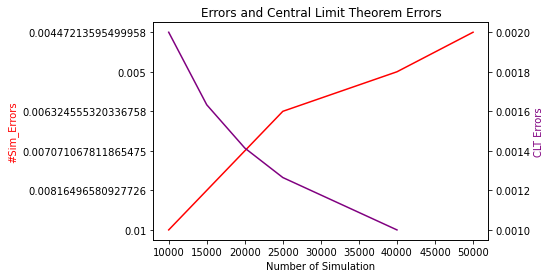

In [44]:
fig, ax = plt.subplots()

ax.plot(final_df['Number of Simulation'], final_df['Monte Carlo Error'], color='red')
ax.set_xlabel("Number of Simulation")
ax.set_ylabel("#Sim_Errors", color='red')

ax2 = ax.twinx()
ax2.plot(final_df['Number of Simulation'], final_df['Central Limit Theorem Error'], color='purple')
ax2.set_xlabel("Number of Simulation")
ax2.set_ylabel("CLT Errors", color='purple')

plt.title("Errors and Central Limit Theorem Errors")
plt.show()

**Conclusion** <br>
In conclusion, from my experiments and simulations, I have come to the conclusion that the higher the number of simulations carried out, the lower the error of the price paths. This evident as both the MC and CLT error are decreasing as the number of simulations is increasing. Another finding shown via the results is that lookback options tend to be much more expensive than Asian options.

**References**<br>
[Euler–Maruyama method](https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method)<br>
[Pricing Asian Options using Monte Carlo Methods by Hongbin Zhang ](http://uu.diva-portal.org/smash/get/diva2:301070/FULLTEXT01.pdf)<br>
[Binary, barrier and Asian options](https://github.com/cantaro86/Financial-Models-Numerical-Methods/blob/master/2.2%20Exotic%20options.ipynb)<br>
[Pricing Asian Options by Lars B. Nielsen](http://quantlabs.net/academy/download/free_quant_instituitional_books_/[Nielsen]%20Pricing%20Asian%20Options.pdf)<br>
[Option Payoffs, Black-Scholes and the Greeks](https://clinthoward.github.io/portfolio/2017/04/16/BlackScholesGreeks/)<br>
[Pricing Options by Monte Carlo Simulation with Python](https://www.codearmo.com/blog/pricing-options-monte-carlo-simulation-python)<br>
[Using the Euler-Maruyama Method for Finding a Solution to Stochastic Financial Problems](http://www.mecs-press.org/ijisa/ijisa-v8-n6/IJISA-V8-N6-6.pdf)<br>
[Central Limit Theorem](https://www.cliffsnotes.com/study-guides/statistics/sampling/central-limit-theorem)<br>
[Paul Wilmott introduces quantitative finance](https://www.perlego.com/book/1008048/paul-wilmott-introduces-quantitative-finance-pdf)